<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Metodo_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Metodo minimos cuadrados

El método de mínimos cuadrados es una técnica usada para obtener una
solución aproximada de una ecuación diferencial cuando la solución exacta
es difícil de calcular. Para ello se propone una función aproximada de la forma

$$ u_N(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \cdots $$

la cual depende de parámetros desconocidos. Al sustituir esta aproximación
en la ecuación diferencial, aparece un error o $residuo$



Como la función propuesta no satisface exactamente la ecuación, se busca que
el error sea lo más pequeño posible en promedio. Esto se logra minimizando

$$
\int_a^b E(x)^2 \, dx,
$$

que representa el error total al cuadrado. Para obtener los coeficientes
\(\alpha_k\), se imponen las condiciones

$$
\frac{\partial }{\partial a} = 0,
$$

lo que produce un sistema de ecuaciones lineales. Al resolverlo se obtiene
la mejor aproximación en el sentido de mínimos cuadrados. Este método
proporciona soluciones suaves y permite comparar con otros métodos como
colocación o Galerkin.

**Ejercicio 5.8** Considera el problema de valor inicial
$u'' + u = x$
con condiciones
$$u(0) = 0$$ y $$u'(0) = 2$$
del Ejercicio 5.1.

Encuentra nuevamente una solución aproximada de la forma  
$u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots$  
pero ahora usando el método de mínimos cuadrados.

Compara esta solución con la del Ejercicio 5.1.

Usando calculo simbolico

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = sp.symbols('x') #introducimos una variable
a, b = sp.symbols('a b') #introducimos una variable
u = sp.Function('u') #introducimos una funcion

Resolviendo con las condiciones del ejercicio $$u(0)= 0$$
$$u'(0)=2$$


In [5]:
ode = u(x).diff(x,x) + u(x) - x
sol = sp.dsolve(ode, ics={u(0):0, sp.diff(u(x),x).subs(x,0):2})

In [6]:
sol

Eq(u(x), x + sin(x))

Obteniendo la solucion exacta

In [7]:
u_expr = sol.rhs
u_num = sp.lambdify(x, u_expr, "numpy")

Graficando

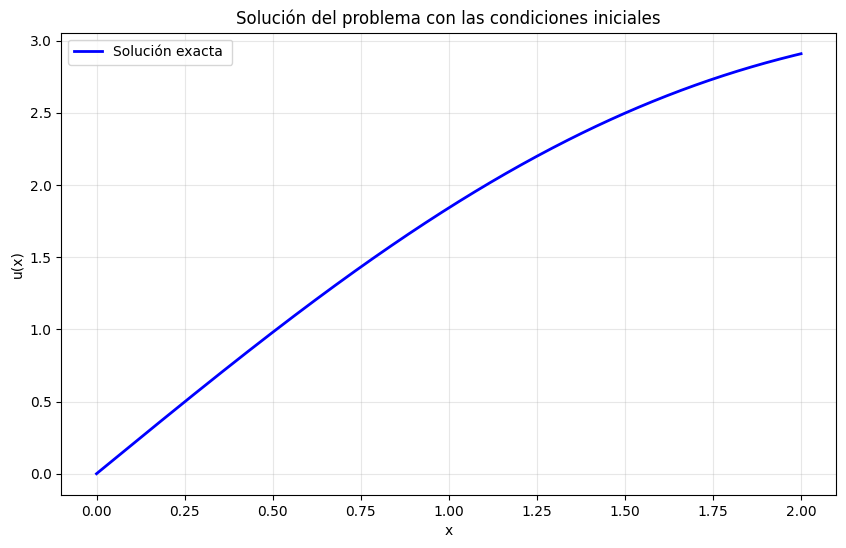

In [9]:
xx = np.linspace(0, 2, 500)  # Evaluamos hasta x=2 para ver mejor
yy_exact = u_num(xx)

plt.figure(figsize=(10, 6))
plt.plot(xx, yy_exact, 'b-', label="Solución exacta ", linewidth=2)
plt.title("Solución del problema con las condiciones iniciales")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

La gráfica muestra la solución exacta del problema diferencial en el
intervalo $$(0 \le x \le 2)$$. La curva representa cómo evoluciona la
función $(u(x))$ cumpliendo las condiciones iniciales $$u(0)=0 $$ y
$$u'(0)=2$$ Se observa un comportamiento suave que permite visualizar
el crecimiento y la curvatura de la solución a lo largo del dominio.

**Solucion numerica con el metodo de minimos cuadrados**

Proponemos una solucion cubica

In [13]:
u_n = 2*x + a*x**2 + b*x**3

Definiendo el error E

In [14]:
u_n_2 = sp.diff(u_n, x, 2)

E = u_n_2 + u_n - x

In [15]:
E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

Imponemos las condiciones para obtener los puntos criticos del residuo:

$$ \frac{\partial }{ \partial a } \int_0^1 E^2dx = 0$$
$$  \frac{\partial }{ \partial b } \int_0^1 E^2dx = 0$$.

Y resolviendo el sistema de ecuaciones resultantes

In [16]:
I = sp.integrate(E**2, (x, 0, 1))

In [17]:
I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

Calculando las derivadas parciales recpecto a a y b

In [18]:
dIa = sp.diff(I, a)
dIb = sp.diff(I, b)

In [20]:
print(dIa, "\n", dIb)

166*a/15 + 49*b/3 + 5/2 
 49*a/3 + 1018*b/35 + 22/5


Resolviendo el sistema igualando las derivadas parciales a 0

In [21]:
soleq = sp.solve([dIa, dIb], [a, b], simplify=True)
print("\nSolución del sistema ")
soleq


Solución del sistema (valores de a y b):


{a: -1335/86789, b: -24759/173578}

In [22]:
u_approx = u_n.subs(soleq)

In [23]:
print("\nLa solución aproximada por mínimos cuadrados:")
u_approx


La solución aproximada por mínimos cuadrados:


-24759*x**3/173578 - 1335*x**2/86789 + 2*x

Graficando

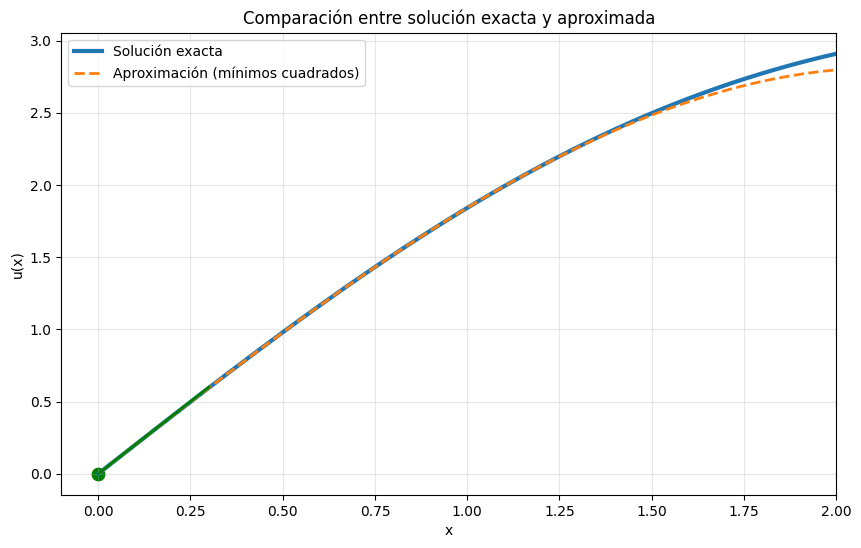

In [25]:
#Funciones exacta y aproximada
u_approx_fn = sp.lambdify(x, u_approx, "numpy")
xx = np.linspace(0, 2, 200)

yy_exact = u_num(xx)
yy_approx = u_approx_fn(xx)

plt.figure(figsize=(10, 6))

#Graficar soluciones
plt.plot(xx, yy_exact, label="Solución exacta", linewidth=3)
plt.plot(xx, yy_approx, '--', label="Aproximación (mínimos cuadrados)", linewidth=2)

#Condiciones iniciales
plt.scatter(0, 0, color='green', s=80)        # u(0)=0
plt.plot([0, 0.3], [0, 0.6], 'g-', linewidth=2)  # u'(0)=2

plt.title("Comparación entre solución exacta y aproximada")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(-0.1, 2)

plt.show()



La gráfica muestra la solución exacta junto con la aproximación obtenida
por el método de mínimos cuadrados. Se puede ver que ambas curvas son muy
parecidas y siguen casi el mismo comportamiento. También se marcan las
condiciones iniciales en el punto $(x=0)$

###ERROR

In [29]:
error_fn = sp.lambdify(x, u_expr - u_approx, "numpy")
xx_eval = np.linspace(0, 1, 1000)
err = error_fn(xx_eval)

print("Error cuadratico:", np.mean(err**2))
print("Error máximo:", np.max(np.abs(err)))

Error cuadratico: 4.6637157926018425e-07
Error máximo: 0.0011010278350023217


**Conclusion**: Al comparar los resultados, se ve que ambos métodos dan una aproximación
muy parecida a la solución exacta. El método de colocación coincide mejor
en algunos puntos del intervalo, mientras que el de mínimos cuadrados
intenta que el error sea pequeño en todo el tramo. En general, los dos
funcionan bien, pero colocación es más preciso en puntos específicos y
mínimos cuadrados da una curva más uniforme.